In [1]:
# Loading Data 
import pandas as pd  
import numpy as np
from pathlib import Path
import seaborn as sns
import alpaca_trade_api as tradeapi

import matplotlib.pyplot as plt
%matplotlib inline
import os 
from dotenv import load_dotenv
import yfinance as yf
import quandl


Bad key "text.kerning_factor" on line 4 in
C:\Users\anduc\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Import Quandl API key
load_dotenv()
quandl_api_key = os.getenv("QUANDL_API_KEY")

In [3]:
# GDP from Quandl 
#gdp = quandl.get("FRED/GDP") 
#gdp.tail()

In [10]:
# Dow Jones Data from 2001
DJI = yf.Ticker("^DJI")
DJI_df = DJI.history(period="50y").reset_index()

In [11]:
DJI_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1992-01-02,3152.100098,3172.629883,3139.310059,3172.399902,23550000,0,0
1,1992-01-03,3172.399902,3210.639893,3165.919922,3201.500000,23620000,0,0
2,1992-01-06,3201.500000,3213.330078,3191.860107,3200.100098,27280000,0,0
3,1992-01-07,3200.100098,3210.199951,3184.479980,3204.800049,25510000,0,0
4,1992-01-08,3204.800049,3229.199951,3185.820068,3203.899902,29040000,0,0


In [12]:
# Cleaned Dow Data 
DJI_df = DJI_df[['Date','Close']].set_index("Date")

In [150]:
DJI_df.head()
DJI_df.to_csv('dji.csv')

In [151]:
# Dow data described 
DJI_df

,Close,pct_change
Date,,
1992-01-03,3201.500000,0.009173
1992-01-06,3200.100098,-0.000437
1992-01-07,3204.800049,0.001469
1992-01-08,3203.899902,-0.000281
1992-01-09,3209.500000,0.001748
1992-01-10,3199.500000,-0.003116
1992-01-13,3185.600098,-0.004344
1992-01-14,3246.199951,0.019023
1992-01-15,3258.500000,0.003789


In [18]:
# Dow Percent Change 
dow_percent_change = DJI_df.pct_change()
DJI_df['pct_change'] = dow_percent_change
DJI_df.dropna(inplace=True)
DJI_df

,Close,pct_change
Date,,
1992-01-03,3201.500000,0.009173
1992-01-06,3200.100098,-0.000437
1992-01-07,3204.800049,0.001469
1992-01-08,3203.899902,-0.000281
1992-01-09,3209.500000,0.001748
1992-01-10,3199.500000,-0.003116
1992-01-13,3185.600098,-0.004344
1992-01-14,3246.199951,0.019023
1992-01-15,3258.500000,0.003789


# One Year Confidence

In [24]:
# Import confidence Data 
confidence_path = Path("data/us_one_year_confidence_index.csv")
confidence = pd.read_csv(confidence_path,parse_dates=True, index_col='Date', infer_datetime_format=True).dropna()

In [28]:
confidence

,US Institutional,US Individual
Date,,
2021-02-01,62.12,75.00
2021-01-01,61.90,73.17
2020-12-01,61.54,69.17
2020-11-01,62.86,70.68
2020-10-01,67.61,70.71
2020-09-01,69.86,70.07
2020-08-01,72.86,73.05
2020-07-01,80.95,73.61
2020-06-01,79.59,75.89


In [29]:
confidence.head()

,US Institutional,US Individual
Date,,
2021-02-01,62.12,75.00
2021-01-01,61.90,73.17
2020-12-01,61.54,69.17
2020-11-01,62.86,70.68
2020-10-01,67.61,70.71


In [30]:
confidence.describe()

,US Institutional,US Individual
count,241.000000,241.000000
mean,77.260996,76.539295
std,6.169238,8.461401
min,54.740000,59.750000
25%,74.030000,70.750000
50%,77.140000,75.820000
75%,80.950000,83.500000
max,92.590000,95.620000


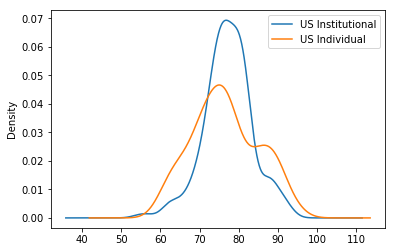

In [31]:
confidence_dist = confidence.plot.density()

In [32]:
scat = confidence.reset_index()
scat.plot.scatter(x='Date', y='US Institutional')
scat.plot.scatter(x='Date', y= 'US Individual')

ValueError: scatter requires x column to be numeric

In [33]:
# US Institutional data greater than 80%
upper_q = confidence.loc[confidence['US Institutional'] > 80].round(2)
upper_q.head()

,US Institutional,US Individual
Date,,
2020-07-01,80.95,73.61
2020-05-01,81.90,74.05
2020-04-01,80.99,75.00
2020-03-01,81.42,70.94
2014-09-01,82.17,64.97


In [39]:
#upper_q.plot.density()

In [40]:
scatter_upper_q = upper_q.reset_index()
scatter_upper_q.plot.scatter(x='Date' , y=['US Institutional'])


#rolling_6 = 
#upper_q.rolling(window=6).mean().dropna()                       


ValueError: scatter requires x column to be numeric

In [41]:
scatter_upper_q.plot.scatter(x='Date' , y=['US Individual'])


ValueError: scatter requires x column to be numeric

In [42]:
#ax = rolling_6.plot(figsize = (10,5), title='Rolling 6 Month of Mean Confidence In The Upper Quartile of Confidence')

In [43]:
upper_q.corr()

,US Institutional,US Individual
US Institutional,1.000000,0.521777
US Individual,0.521777,1.000000


In [44]:
upper_q.head()

,US Institutional,US Individual
Date,,
2020-07-01,80.95,73.61
2020-05-01,81.90,74.05
2020-04-01,80.99,75.00
2020-03-01,81.42,70.94
2014-09-01,82.17,64.97


In [45]:
# US individual less than 70%
lower_q = confidence.loc[confidence['US Individual'] < 70].round(2)
lower_q.head()

,US Institutional,US Individual
Date,,
2020-12-01,61.54,69.17
2020-02-01,79.34,65.00
2020-01-01,72.17,64.35
2019-12-01,72.22,62.16
2019-11-01,70.09,63.96


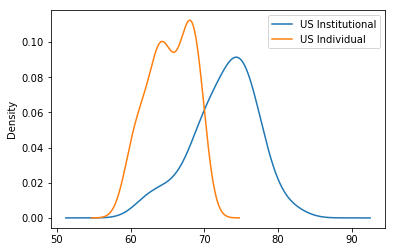

In [46]:
lower_q.plot.density()

In [47]:
#scatter_lower_q = lower_q.reset_index()
#scatter_lower_q.plot.scatter(x='Date' , y=['US Institutional'])
#scatter_lower_q.plot.scatter(x='Date' , y=['US Individual'])


#lower_rolling_6 = lower_q.rolling(window=6).mean().dropna()

In [48]:
#ax = lower_rolling_6.plot(figsize=(10,5), title='Rolling 6 Month of Mean Confidence In The Lower Quartile of Confidence')

In [49]:
#lower_q.corr()

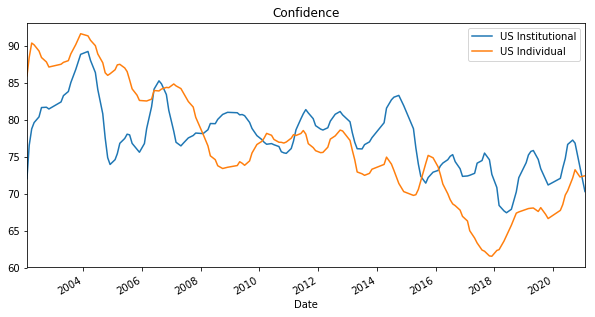

In [50]:
# Percent of Dow when individual confidence less than 70%
dow_and_confidence = pd.concat([DJI_df,confidence], axis=1, join='inner')
#dow_and_confidence[['US Institutional', "US Individual"]].plot(figsize=(10,5))
dow_and_confidence_rolling_us = dow_and_confidence[['US Institutional', "US Individual"]].rolling(window=6).mean().dropna()
ax = dow_and_confidence_rolling_us.plot(figsize=(10,5), title='Confidence')

In [152]:
heatmap

,Close,US Institutional,US Individual
Close,1.000000,-0.495710,-0.720796
US Institutional,-0.495710,1.000000,0.511688
US Individual,-0.720796,0.511688,1.000000


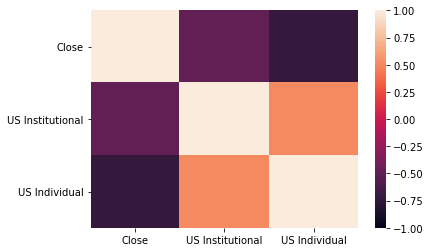

In [51]:
heatmap = dow_and_confidence[['Close', 'US Institutional', 'US Individual']].corr()
sns.heatmap(heatmap, vmin = -1, vmax = 1)

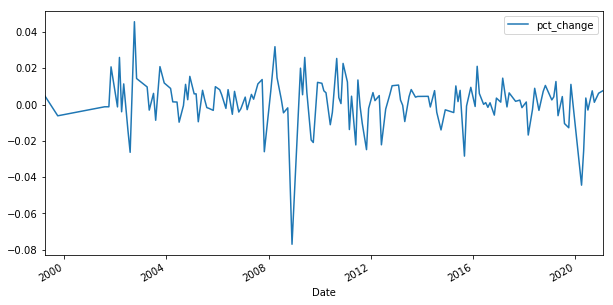

In [52]:
dow_and_confidence[['pct_change']].plot(figsize=(10,5))

In [53]:
#dow_and_confidence[['US Institutional', 'US Individual']].plot(figsize=(10,5))

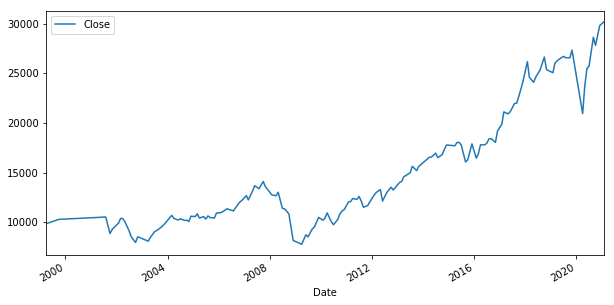

In [54]:
dow_and_confidence[['Close']].plot(figsize=(10,5))

,US Institutional,US Individual
Date,,
2021-01-01,-0.003542,-0.024400
2020-12-01,-0.005816,-0.054667
2020-11-01,0.021449,0.021830
2020-10-01,0.075565,0.000424
2020-09-01,0.033279,-0.009051


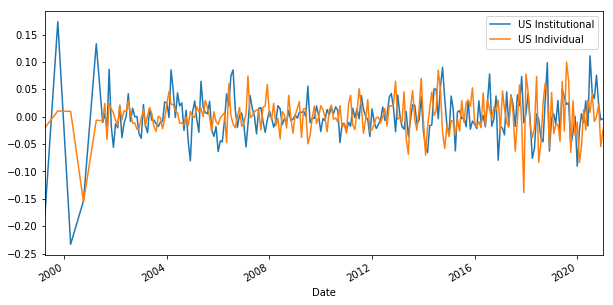

In [163]:
# Confidence percent change
confidence_pct_change = confidence.pct_change().dropna()
confidence_pct_change.plot(figsize=(10,5))
confidence_pct_change.head()

In [56]:
dow_and_confidence_pct = dow_and_confidence[['Close', 'US Institutional', 'US Individual']].pct_change()

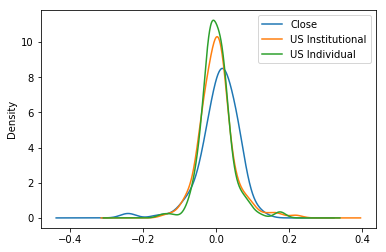

In [57]:
dow_and_confidence_pct.plot.density()

# Valuation Confidence Index

In [58]:
#valuation
valuation = Path("data/us_valuation_confidence_index.csv")
valuation = pd.read_csv(valuation,parse_dates=True, index_col='Date', infer_datetime_format=True).dropna()

In [59]:
valuation

,US Institutional,US Individual
Date,,
2021-02-01,42.70,29.51
2021-01-01,43.82,28.78
2020-12-01,44.68,31.47
2020-11-01,41.84,33.77
2020-10-01,46.39,34.16
2020-09-01,45.92,37.87
2020-08-01,50.00,42.24
2020-07-01,54.72,45.86
2020-06-01,56.30,49.68


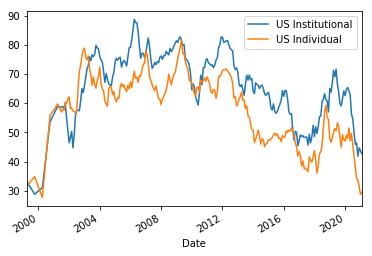

In [60]:
valuation.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F63AB0088>,
      dtype=object)

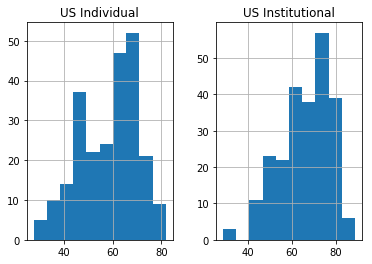

In [61]:
valuation.hist()

# Dow on Confidence Indicator

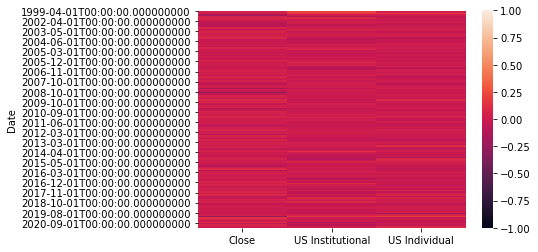

In [62]:
sns.heatmap(dow_and_confidence_pct, vmin=-1, vmax=1)

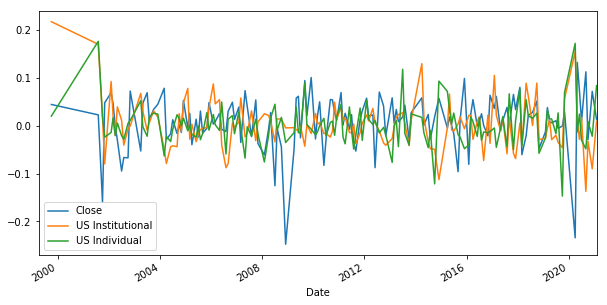

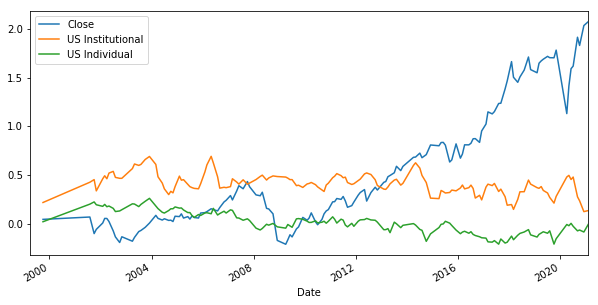

In [160]:
dow_and_confidence_pct.plot(figsize=(10,5))
d_n_c_pct_cum = (1+dow_and_confidence_pct).cumprod() -1
d_n_c_pct_cum.plot(figsize=(10,5))

# Crash Confidence

In [64]:
# Import confidence Data (Percent of population that thinks market is not too high)
# High numnber indicates more bullish sentiment 
# Low number indicates bearish sentiment
crash = Path("data/us_crash_confidence_index.csv")
crash = pd.read_csv(crash, parse_dates=True, index_col='Date', infer_datetime_format=True)

In [65]:
crash.head()

,US Institutional,US Individual
Date,,
2021-02-01,34.83,25.37
2021-01-01,26.09,22.08
2020-12-01,25.77,19.38
2020-11-01,23.53,16.48
2020-10-01,25.00,13.59


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F63891C08>,
      dtype=object)

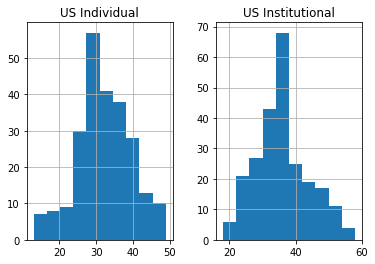

In [66]:
crash.hist()

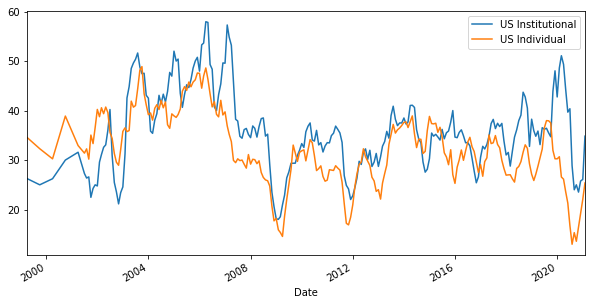

In [67]:
crash.plot(figsize=(10,5))

In [68]:
crash.describe()

,US Institutional,US Individual
count,241.000000,241.000000
mean,35.869917,32.207593
std,8.087025,7.242575
min,18.020000,12.990000
25%,30.930000,28.050000
50%,35.230000,31.750000
75%,40.370000,37.310000
max,57.950000,48.880000


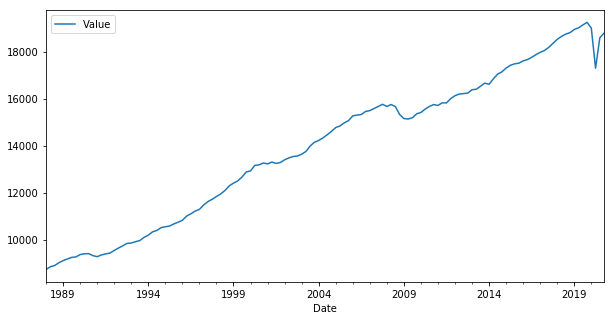

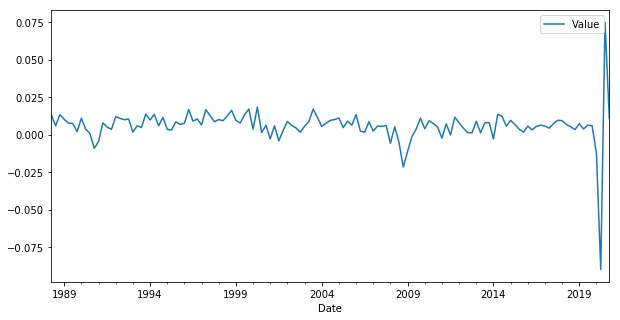

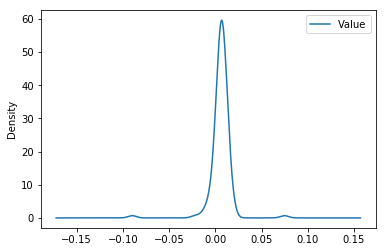

In [93]:
real_gdp = quandl.get("FRED/GDPC1", start_date='1988-01-01', end_date = '2021-02-01', collapse = 'monthly') 
real_gdp.plot(figsize=(10,5))
gdp_pct = real_gdp.pct_change().dropna()
gdp_pct.plot(figsize=(10,5))
gdp_pct.plot.density()

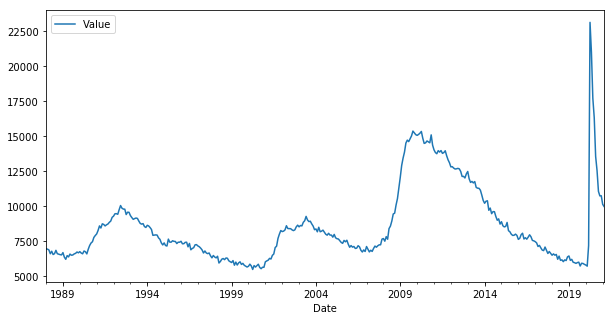

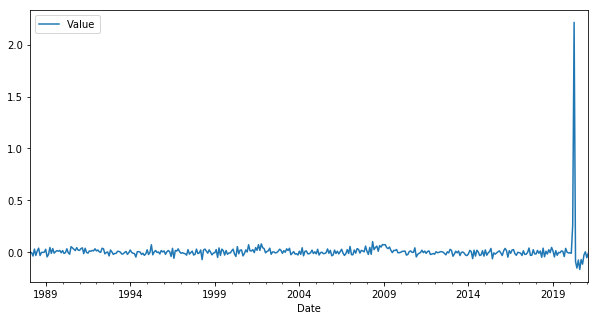

In [70]:
unemployment_level = quandl.get("FRED/UNEMPLOY", start_date='1988-01-01', end_date = '2021-02-01', collapse = 'monthly') 
unemployment_level.plot(figsize=(10,5))
unemployment_pct = unemployment_level.pct_change().dropna()
unemployment_pct.plot(figsize=(10,5))

In [ ]:
confidence_levels.to_csv('confidence_levels.csv')

In [120]:
SandPComposite = quandl.get("YALE/SPCOMP", start_date='1988-01-01', end_date = '2021-02-01', collapse = 'monthly')
SandP_Percent = SandPComposite['S&P Composite'].pct_change()
#SandP = pd.concat([SandPComposite, SandP_Percent], axis=1, join='inner')

#SandP = pd.concat([SandPComposite, SandP_Percent], axis=1, join='inner')
#SandP['S&P Composite'] = ['S&P Composite']

LimitExceededError: (Status 429) (Quandl Error QELx04) You have exceeded the API speed limit of 20 calls per 10 minutes. Please slow down your requests.

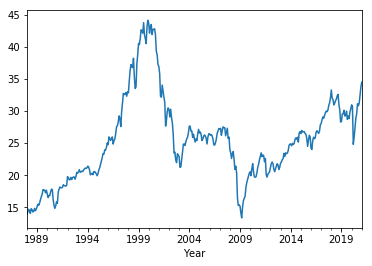

In [168]:
SandPComposite['Cyclically Adjusted PE Ratio'].plot()

In [72]:
SandPComposite

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
count,397.000000,396.000000,396.000000,397.000000,397.000000,397.000000,396.000000,396.000000,397.000000
mean,1273.975093,24.594801,57.956263,191.312537,4.641955,1620.817762,31.676672,74.257088,25.358096
std,775.564358,13.955422,34.267721,41.847189,2.201888,707.238621,11.237996,30.828778,6.689058
min,250.500000,8.856670,6.860000,115.700000,0.620000,568.145691,20.087341,8.462985,13.323668
25%,647.170000,14.142525,26.710000,156.300000,2.710000,1050.626433,23.310208,48.143859,20.535549
50%,1181.410000,18.693333,49.695000,189.500000,4.520000,1581.229787,26.135073,70.095874,25.174462
75%,1511.140000,29.728333,86.952500,230.280000,6.260000,2069.514856,35.056799,99.514650,28.836810
max,3793.748421,59.680000,139.470000,261.582000,9.360000,3805.800492,61.047113,142.421961,44.197940


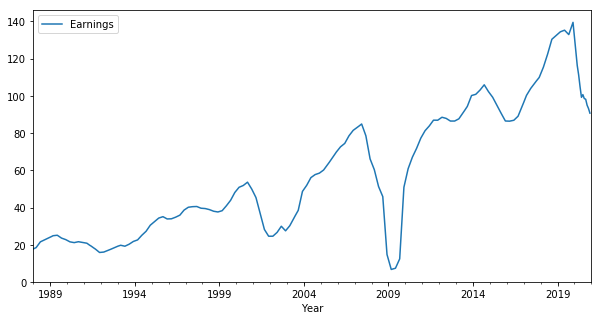

In [73]:
e = SandPComposite[['Earnings']].plot(figsize=(10,5))

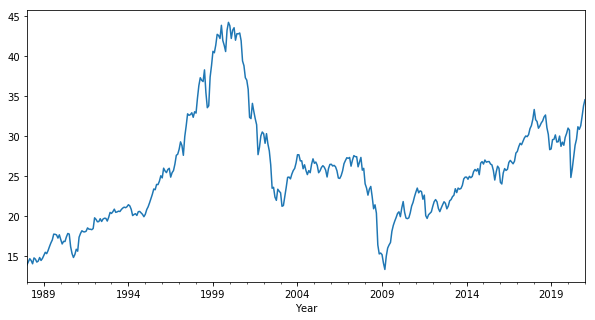

In [74]:
p = SandPComposite['Cyclically Adjusted PE Ratio'].plot(figsize=(10,5))

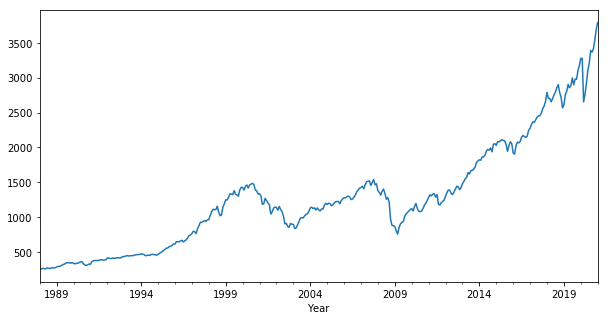

In [75]:
SandPComposite['S&P Composite'].plot(figsize=(10,5))

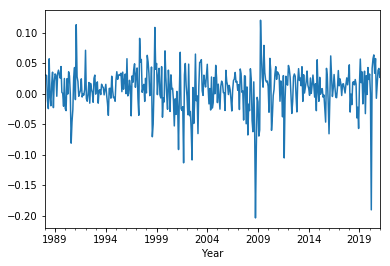

In [91]:
SandPComposite['S&P Composite'].pct_change().plot()

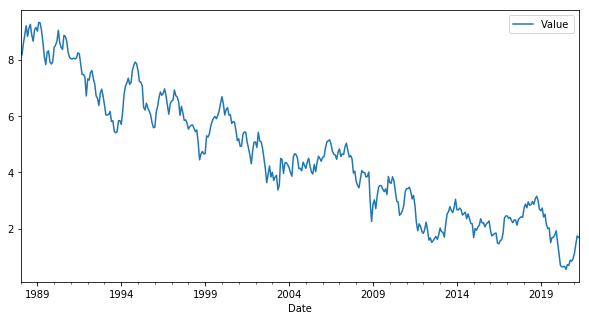

In [76]:
ten_yr = quandl.get('FRED/DGS10', start_date= '1988-01-01', end_date = '2021-04-01', collapse = 'monthly')
ten_yr.plot(figsize=(10,5))

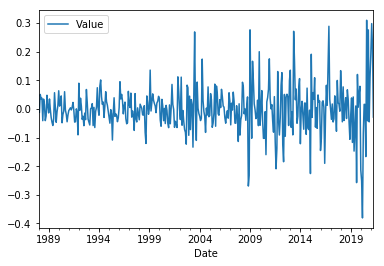

In [90]:
ten_yr.pct_change().plot()

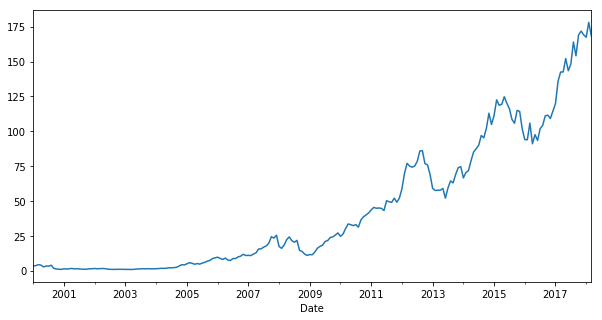

In [77]:
aapl = quandl.get('WIKI/AAPL', start_date="2000-01-01", end_date="2021-04-01", collapse = 'monthly')
aapl['Adj. Close'].plot(figsize=(10,5))

In [78]:
#tlt = quandl.get('WIKI/TLT', start_date="2000-01-01", end_date="2021-04-01", collapse = 'monthly')
#vix = aapl = quandl.get('WIKI/VIX', start_date="2000-01-01", end_date="2021-04-01", collapse = 'monthly')


In [79]:
#sentiment = quandl.get('AAII/AAII_SENTIMENT', collapse = 'monthly')
#sentiment


#The AAII Investor Sentiment Survey measures the percentage of individual investors who are bullish, bearish, 
#and neutral on the stock market for the next six months; individuals are polled from the ranks of the AAII 
#membership on a weekly basis. Only one vote per member is accepted in each weekly voting period.

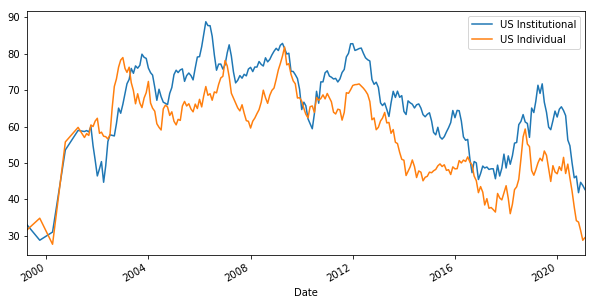

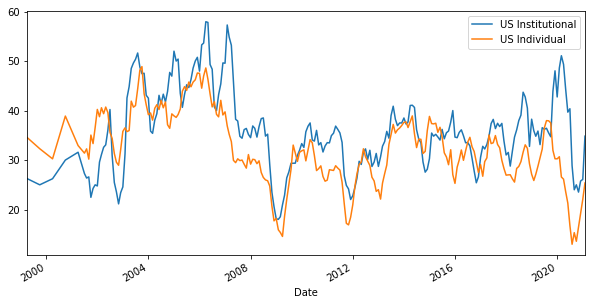

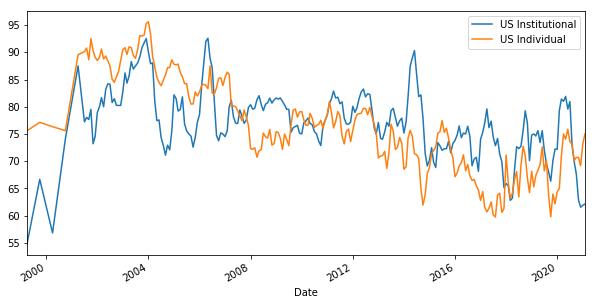

In [80]:
valuation.plot(figsize=(10,5))

crash.plot(figsize=(10,5))

confidence.plot(figsize=(10,5))

In [142]:
confidence_levels = pd.concat([confidence,valuation, crash], axis=1, join='inner')

In [143]:
confidence_levels.head()

,US Institutional,US Individual,US Institutional,US Individual,US Institutional,US Individual
Date,,,,,,
2021-02-01,62.12,75.00,42.70,29.51,34.83,25.37
2021-01-01,61.90,73.17,43.82,28.78,26.09,22.08
2020-12-01,61.54,69.17,44.68,31.47,25.77,19.38
2020-11-01,62.86,70.68,41.84,33.77,23.53,16.48
2020-10-01,67.61,70.71,46.39,34.16,25.00,13.59


In [145]:
confidence_levels.columns = ['ins_conf', 'ind_conf', 'ins_val', 'ind_val', 'ins_crash', 'ind_crash']

In [146]:
confidence_levels.to_csv('confidence_levels.csv')

In [159]:
confidence_pct_change.head()

,US Institutional,US Individual
Date,,
2021-01-01,-0.003542,-0.024400
2020-12-01,-0.005816,-0.054667
2020-11-01,0.021449,0.021830
2020-10-01,0.075565,0.000424
2020-09-01,0.033279,-0.009051


In [165]:
confidence_levels_pct = confidence_levels.pct_change().dropna()
confidence_levels_pct.tail()

,ins_conf,ind_conf,ins_val,ind_val,ins_crash,ind_crash
Date,,,,,,
2001-04-01,0.133126,-0.006545,0.005288,0.048789,0.158049,0.048726
2000-10-01,-0.153486,-0.155667,-0.090955,-0.066767,-0.050032,0.180990
2000-04-01,-0.232888,0.009655,-0.420758,-0.503676,-0.125667,-0.222165
1999-10-01,0.173354,0.010479,-0.072188,0.258309,-0.046893,0.067438
1999-04-01,-0.178941,-0.020093,0.147621,-0.092449,0.050800,0.071229


In [148]:
confidence_levels_pct.to_csv('confidence_levels_pct.csv')

In [166]:
dow_and_confidence_pct

,Close,US Institutional,US Individual
Date,,,
1999-04-01,NaN,NaN,NaN
1999-10-01,0.044799,0.217939,0.020505
2001-08-01,0.023071,0.170691,0.176951
2001-10-01,-0.159199,0.018834,0.018835
2001-11-01,0.048328,-0.079477,-0.023568
2002-02-01,0.069448,0.092896,-0.013729
2002-03-01,0.046592,0.020875,0.016951
2002-04-01,-0.000594,-0.020448,-0.019980
2002-05-01,-0.029246,0.039750,0.006195
